# <h1>Basic Deep Learning Model: TensorFlow, Keras, Sequential model.</h1>
<p>In general, perform the following tasks:Define, Compile, Fit, and Evaluate the model then use the model to make predictions.</p>

In [1]:
#pip install opencv-python

In [2]:
#pip install tensorflow

In [46]:
#pip install Keras-Preprocessing

In [48]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage 
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

from tensorflow.keras.datasets import mnist

import warnings
warnings.filterwarnings("ignore")

In [49]:
#check version
print(tf.__version__)

2.15.0


# Example 1: Build a Sequential Model with Iris Dataset

In [50]:
#Read the data
iris=pd.read_csv('python-data/iris_dataset.csv')

In [51]:
type(iris)

pandas.core.frame.DataFrame

In [52]:
iris.shape

(150, 5)

In [53]:
X=iris.values[:,:-1]
y=iris.values[:,-1]

In [54]:
type(X)

numpy.ndarray

In [55]:
X=X.astype('float32')

In [56]:
#convert categorical to int
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [57]:
#Get train test data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [58]:
(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

((105, 4), (45, 4), (105,), (45,))

In [59]:
#How many input features
num_features=X_train.shape[1]
num_features

4

In [60]:
#Scale the datap--this uses mean and standard deviation
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [61]:
X_train[:2]

array([[-0.4134164 , -1.4644012 , -0.10014565, -0.32149985],
       [ 0.55122215, -0.4958211 ,  0.7177107 ,  0.35364988]],
      dtype=float32)

In [62]:
X_test[:2]

array([[ 0.31006223, -0.4958211 ,  0.4840374 , -0.0514399 ],
       [-0.17225707,  1.9256301 , -1.268512  , -1.2667094 ]],
      dtype=float32)

# Build Sequential model. Adds layers in a linear manner

In [63]:
#Create the model and add layers-Step 1
#activations:['relu','softmax','sigmoid', 'tanh','etc.']
#kernel_initializers:['uniform','normal','he_normal','he_uniform', 'etc.']
def createDLModel():
    model=Sequential() #defines sequential model to which we add layers
    model.add(Dense(units=20, activation='relu', kernel_initializer='uniform',\
                    input_shape=(num_features,))) #adds a layer---fully connected
    model.add(Dense(units=16,activation='relu',kernel_initializer='uniform')) #fully connected layer
    model.add(Dense(units=8,activation='relu',kernel_initializer='uniform'))#fully connected layer
    model.add(Dense(units=3,activation='softmax')) #remember we want to classify into setosa, versicolor, and virginica. #fully connected layer
    return model

In [64]:
#set up model
model=createDLModel()

In [65]:
#compile the model- Step 2
#Select the loss function to optimize (e.g. MSE, cross entropy, etc) and the optimizer (e.g. adam, nadam, etc)
#e.g. 'binary_crossentropy' for binary classification, 'mse' (mean squared error) for regression, 
#and'sparse_categorical_crossentropy' for multi-class classification.
#Also includes setting the list of metrics

#optimizers:['adam','nadam','SGD','Adamax','etc.']

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
#1- loss: sparse_categorical_crossentropy for integer form targets
#2- optitimizer: optimization algorithm for stochastic gradient descent for training deep learning models.

In [66]:
#Fit the model- Step 3
#verbose 2 means it displays progress. verbose 0 disables display of progress.
#batch_size - number of samples
model.fit(X_train,y_train,epochs=15, 
          batch_size=15, verbose=2) 

Epoch 1/15
7/7 - 1s - loss: 1.0978 - accuracy: 0.2952 - 596ms/epoch - 85ms/step
Epoch 2/15
7/7 - 0s - loss: 1.0947 - accuracy: 0.3524 - 37ms/epoch - 5ms/step
Epoch 3/15
7/7 - 0s - loss: 1.0897 - accuracy: 0.3619 - 20ms/epoch - 3ms/step
Epoch 4/15
7/7 - 0s - loss: 1.0818 - accuracy: 0.3524 - 24ms/epoch - 3ms/step
Epoch 5/15
7/7 - 0s - loss: 1.0697 - accuracy: 0.4476 - 17ms/epoch - 2ms/step
Epoch 6/15
7/7 - 0s - loss: 1.0526 - accuracy: 0.6381 - 16ms/epoch - 2ms/step
Epoch 7/15
7/7 - 0s - loss: 1.0298 - accuracy: 0.6381 - 17ms/epoch - 2ms/step
Epoch 8/15
7/7 - 0s - loss: 1.0018 - accuracy: 0.6381 - 18ms/epoch - 3ms/step
Epoch 9/15
7/7 - 0s - loss: 0.9673 - accuracy: 0.6476 - 27ms/epoch - 4ms/step
Epoch 10/15
7/7 - 0s - loss: 0.9290 - accuracy: 0.6476 - 12ms/epoch - 2ms/step
Epoch 11/15
7/7 - 0s - loss: 0.8855 - accuracy: 0.6476 - 15ms/epoch - 2ms/step
Epoch 12/15
7/7 - 0s - loss: 0.8409 - accuracy: 0.6476 - 18ms/epoch - 3ms/step
Epoch 13/15
7/7 - 0s - loss: 0.7939 - accuracy: 0.6476 - 21

In [67]:
#Evaluate the model-Step 4
loss, acc=model.evaluate(X_test,y_test,verbose=0)
print(f"Accuracy: {acc:.3f}")
print(f"Loss: {loss:.3f}")

Accuracy: 0.711
Loss: 0.648


In [68]:
#Test prediction- Apply the model. The trained model can also be applied at this stage.
x151=[4.8,3.4,1.6,0.2]#setosa
x151=scaler.transform([x151])
print(x151)
y_pred=model.predict([x151])
print(f'Predicted: {y_pred}\nSpecies: {np.argmax(y_pred)}')
    #argmax returns the indices of the maximum values along an axis.


[[-1.25747489  0.95704976 -1.32693037 -1.40173942]]
1/1 [==============================] - 0s 52ms/step
Predicted: [[0.5647342  0.19071987 0.24454603]]
Species: 0


In [69]:
#Test prediction- Apply the model
x152=[5.4,3,4.5,1.5] #versicolor
x152=scaler.transform([x152])
print(x152)
y_pred=model.predict([x152])
print(f'Predicted: {y_pred}\nSpecies: {np.argmax(y_pred)}')
    #argmax returns the indices of the maximum values along an axis.


[[-0.53399618 -0.01153073  0.36720087  0.35364987]]
1/1 [==============================] - 0s 23ms/step
Predicted: [[0.11200915 0.39701    0.49098083]]
Species: 2


In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                100       
                                                                 
 dense_9 (Dense)             (None, 16)                336       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 3)                 27        
                                                                 
Total params: 599 (2.34 KB)
Trainable params: 599 (2.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Example 2- Build CNN for image classification. 

Have convolution and pooling layers. 

Convolution layers generate feature maps, pooling layers collect important features.

MNIST dataset-link for more info on the dataset: http://yann.lecun.com/exdb/mnist/

Cotains images of handwritten digits in grayscale. A grayscale image has just one channel.

60000 training instances; 10000 test instances.

The instances are 28*28 images

CNN: convolution layer takes a filter and multiplies the input matrix (element-wise) 
with the filter, thereby generating new features. It uses dot-matrix multiplication.

In [71]:
#load MNIST dataset-load_data() returns a 2-tuple

(X_mn_train,y_mn_train), (X_mn_test,y_mn_test)=mnist.load_data()
len(X_mn_train), len(X_mn_test)

(60000, 10000)

In [72]:
X_mn_train.shape #notice the channel is missing in the shape
                #-----for RGB images,channel is 3; 1 for grayscale images

(60000, 28, 28)

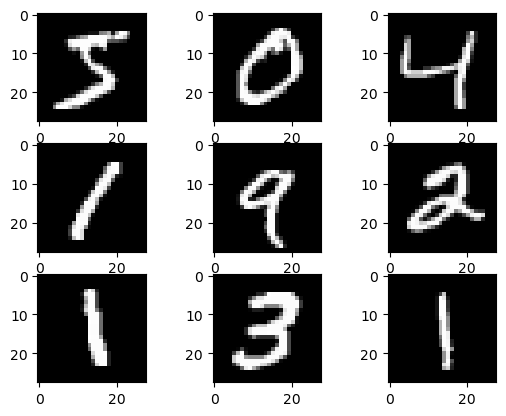

In [73]:
#Sample the images in the training set and display them
for im_index in range(9):
    plt.subplot(3,3,im_index+1)
    plt.imshow(X_mn_train[im_index],cmap='gray')#cmap='gray' is a good alternative
    
plt.show()

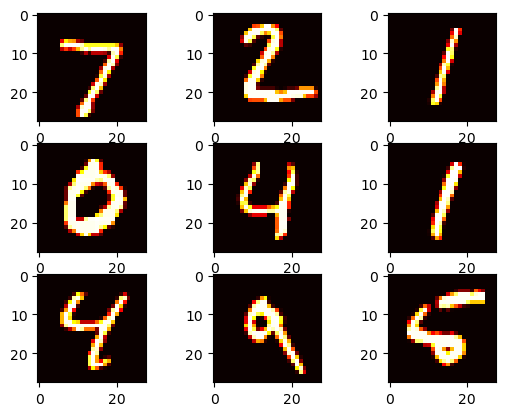

In [74]:
#Sample the images in the test set and display them
for im_index in range(9):
    plt.subplot(3,3,im_index+1)
    plt.imshow(X_mn_test[im_index],cmap='hot')#cmap='gray' is a good alternative
    
plt.show()

In [75]:
X_mn_train.reshape((60000,28,28))

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [76]:
X_mn_train[300]#see 28*28 image with pixesl ranging between 0-255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 138, 238, 217,  68,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

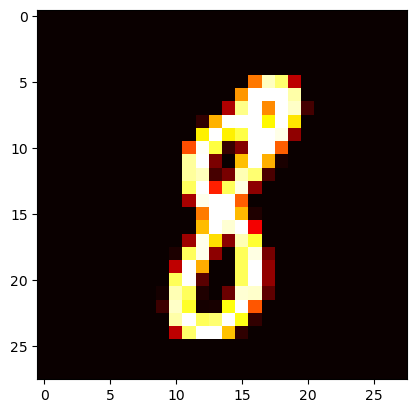

In [77]:
#This is the image plot
plt.imshow(X_mn_train[300],cmap='hot') 
plt.show()

In [78]:
X_mn_train[300][5][17]#what is in row 6, column 18--the value returned is actually channel information

238

In [79]:
X_mn_train[300][5][5]#what is in row 6, column 6

0

In [80]:
#We modify dimension to include channel. 
#CNN expects images to be of the form (rows, columns, channels)
#reshape the data to have a single channel
X_mn_train=X_mn_train.reshape((X_mn_train.shape[0], #image instance---60000
                               X_mn_train.shape[1], #rows-28
                               X_mn_train.shape[2], #columns-28
                               1 #channel--grayscale
                              ))
X_mn_test=X_mn_test.reshape((X_mn_test.shape[0],#image instance---10000
                             X_mn_test.shape[1],#rows-28
                             X_mn_test.shape[2],#columns-28
                             1 #channel--grayscale
                            ))

In [81]:
X_mn_train.shape

(60000, 28, 28, 1)

In [82]:
X_mn_test.shape

(10000, 28, 28, 1)

In [83]:
#Image input shape. This is the shape we will offer as input
in_shape=X_mn_train.shape[1:] #exclude the first index which is for image instance.
in_shape

(28, 28, 1)

In [84]:
#Examine the classes in the target attribute
np.unique(y_mn_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [85]:
#Determine the number of classes that the image can be classifed into
#---we expect 10:(0,1,2,3,4,5,6,7,8,9)---as above
n_classes = len(np.unique(y_mn_train))
n_classes

10

In [86]:
#Scale the pixels from range 0-255 to 0-1. This is good for models that 
#use linear combinations of inputs and need to learn weights
#We first make each instance a float before computation
X_mn_train=X_mn_train.astype('float32')/255.0
X_mn_test=X_mn_test.astype('float32')/255.0

In [87]:
#Create function to return a CNN model.
#The function creates a Sequential model, and adds layers to it. 
#The model is then compiled and returned.
def createCNNModel():
    model=Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu', \
                     kernel_initializer='he_uniform', input_shape=in_shape))
    model.add(MaxPool2D(pool_size=(2,2), strides=1))
    model.add(Flatten()) #will modify input e.g. from (28,28,1) to (28*28*1,), i.e. (784,)
    model.add(Dense(units=100,activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(rate=0.3)) #randomly sets input weights to zero with frequency of rate---to avoid overfitting
    model.add(Dense(units=n_classes,activation='softmax'))
    #Compile model--sets parameters like optimizer, loss function, metrics, etc.
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [88]:
#set up the CNN model
modelCNN=createCNNModel()

In [89]:
#Fit the model
modelCNN.fit(X_mn_train, y_mn_train, epochs=150, batch_size=64, verbose=1)

Epoch 1/150
938/938 [==============================] - 16s 17ms/step - loss: 0.3375 - accuracy: 0.9002
Epoch 2/150
938/938 [==============================] - 17s 18ms/step - loss: 0.1255 - accuracy: 0.9616
Epoch 3/150
938/938 [==============================] - 17s 18ms/step - loss: 0.0894 - accuracy: 0.9721
Epoch 4/150
938/938 [==============================] - 17s 18ms/step - loss: 0.0732 - accuracy: 0.9768
Epoch 5/150
938/938 [==============================] - 17s 18ms/step - loss: 0.0625 - accuracy: 0.9798
Epoch 6/150
938/938 [==============================] - 15s 16ms/step - loss: 0.0532 - accuracy: 0.9823
Epoch 7/150
938/938 [==============================] - 14s 15ms/step - loss: 0.0482 - accuracy: 0.9842
Epoch 8/150
938/938 [==============================] - 17s 18ms/step - loss: 0.0407 - accuracy: 0.9864
Epoch 9/150
938/938 [==============================] - 17s 18ms/step - loss: 0.0349 - accuracy: 0.9883
Epoch 10/150
938/938 [==============================] - 16s 17ms/step - l

In [90]:
#Evaluate 
loss,acc=modelCNN.evaluate(X_mn_test,y_mn_test, verbose=0)
print(f"Accuracy:{acc:.3f}")

Accuracy:0.989


In [91]:
#Predict unseen instance
unseen = X_mn_train[200]
y_pred = modelCNN.predict(np.asarray([unseen]))
print('\n',y_pred,'\n')
print(f'\nPredicted: digit={np.argmax(y_pred)}')
print(f'\nActual: digit={y_mn_train[200]}')

1/1 [==============================] - 0s 75ms/step

 [[7.1083992e-38 1.0000000e+00 5.5215525e-25 9.7143348e-28 1.5588900e-22
  1.2066415e-20 4.2101428e-22 5.3151079e-34 8.8208789e-20 0.0000000e+00]] 


Predicted: digit=1

Actual: digit=1


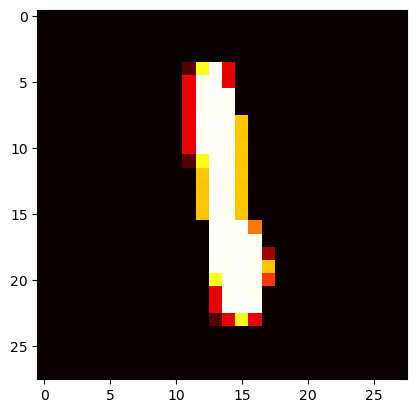

In [92]:
#Check it out with a plot
plt.imshow(unseen,cmap='hot')
plt.show()

In [93]:
#Predict unseen instance
unseen2 = X_mn_test[17]
y_pred = modelCNN.predict(np.asarray([unseen2]))
print('\n',y_pred,'\n')
print(f'\nPredicted: digit={np.argmax(y_pred)}')
print(f'\nActual: digit={y_mn_test[17]}')

1/1 [==============================] - 0s 25ms/step

 [[0.0000000e+00 2.5397318e-34 1.2058308e-29 5.6340095e-37 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 8.6412246e-29]] 


Predicted: digit=7

Actual: digit=7


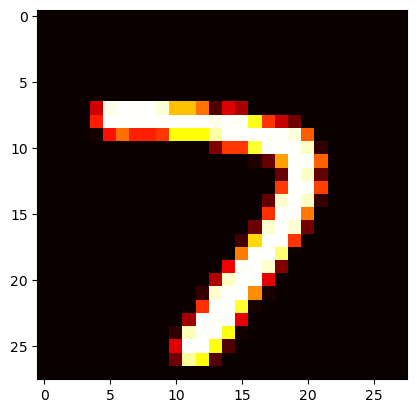

In [94]:
#Check it out with a plot
plt.imshow(unseen2,cmap='hot')  
plt.show()

In [95]:
modelCNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 20000)             0         
                                                                 
 dense_12 (Dense)            (None, 100)               2000100   
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                      

# Classify own dataset 

Use your own or friend's handwritten digits. 

Center the new images just like the mnist dataset (used in training) before classification. Otherwise the prediction results will be very poor.

In [ ]:
#Read the images from files and, prepare them and predict, i.e., read and convert to array

In [ ]:
num_images=10

IMG_SIZE=28
test_images=[]
for i in range(0,num_images):
    image_path='images/image'+str(i)+'.jpg'
    gray_image=cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    test_image = cv2.resize(255-gray_image,  (IMG_SIZE,IMG_SIZE))
    test_image = np.array(test_image).reshape(IMG_SIZE, IMG_SIZE, 1)
    test_image=test_image.astype('float32')
    test_image/=255.0
    test_images.append(test_image)

In [ ]:
test_images[0].shape

In [ ]:
type(test_images[0])

In [ ]:
#Plot test images and display them
for im_index in range(num_images):
    plt.subplot(2,int(num_images/2),im_index+1)
    plt.imshow(test_images[im_index].reshape(28,28),cmap='gray')#cmap='gray' is good 
    
plt.show()

In [ ]:
#Notice relatively poor performance---because our new images have not 
#been processed liked the mnist dataset---they have not been centered on
#a 28x28 box.
correctly_predicted=0
print('*'*40)
for i in range(0,num_images):
    y_pred = modelCNN.predict(np.asarray([test_images[i].reshape(IMG_SIZE,IMG_SIZE,1)]))
    #print('\n',y_pred,'\n')
    actual=i%10
    print(f'\nActual: digit={actual}, Predicted: digit={np.argmax(y_pred)}')
    
    if i==np.argmax(y_pred):
        correctly_predicted+=1

print('*'*40)        
accuracy_on_unseen=correctly_predicted/len(test_images)

print(f"\n\tCorrectly Predicted:{correctly_predicted}\
        \n\tIncorrectly predicted:{len(test_images)-correctly_predicted}\
    \n\tAccuracy on unseen: {accuracy_on_unseen} ")
        

In [ ]:
# create an array where we can store our 10 pictures
test_images = np.zeros((num_images,784)) #10 images with 28*28=784 pixel values

In [ ]:
IMG_SIZE=28
for i in range(0,num_images):
    image_path='images/image'+str(i)+'.jpg'
    gray_image=cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    test_image = cv2.resize(255-gray_image,  (IMG_SIZE,IMG_SIZE))
    test_image = np.array(test_image).reshape(IMG_SIZE, IMG_SIZE, 1)
    test_image=test_image.astype('float32')
    test_image/=255.0
    flatten=test_image.flatten() #from (28,28,1) to (784,)
    test_image=flatten
    #print(test_image)
    test_images[i]=test_image

In [ ]:
#what are the results when the images are not centered.
#Still, no better results because we still haven't centered the images.
correctly_predicted=0
print('*'*40)
for i in range(0,num_images):
    y_pred = modelCNN.predict(np.asarray([test_images[i].reshape(28,28,1)]))
    if i==np.argmax(y_pred):
        correctly_predicted+=1
    print(f'\nActual: digit={i}, Predicted: digit={np.argmax(y_pred)}')
    
print('*'*40)
accuracy_on_unseen=correctly_predicted/len(test_images)

print(f"\n\tCorrectly Predicted:{correctly_predicted}\
        \n\tIncorrectly predicted:{len(test_images)-correctly_predicted}\
    \n\tAccuracy on unseen: {accuracy_on_unseen} ")

# Center the images

For process Follow the link: https://medium.com/@o.kroeger/tensorflow-mnist-and-your-own-handwritten-digits-4d1cd32bbab4 

(c): Ole Kröger

Complete shifting or adjustment

In mnist dataset, it is stated: all images are size normalized to fit in a 20x20 pixel box and they are centered in a 28x28 image using the center of mass. 

These are important pieces of information to use in preprocessing of our own images.

In [98]:
#Now, we center the image
#get the center_of_mass mass 
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)
    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

In [99]:
#shifts the image in the given directions
def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]]) #transformation matrix to shift the image.
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

In [100]:
# create an array where we can store our pictures
num_images=10 #in my test set
test_images = np.zeros((num_images,28,28,1))

# we want to test our images
i = 0
for file_index in range(num_images):
    # read the image
    test_image = cv2.imread("images/image"+str(file_index)+".jpg",
                      cv2.IMREAD_GRAYSCALE)

    # resize the images and invert it (black background)
    test_image = cv2.resize(255-test_image, (28, 28))
    (thresh,test_image) = cv2.threshold(test_image, 128, 255, \
                                    cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    #Fit the images into this 20x20 pixel box- remove every row or column 
    #on the side that is completely black
    while np.sum(test_image[0]) == 0:
        test_image = test_image[1:]

    while np.sum(test_image[:,0]) == 0:
        test_image = np.delete(test_image,0,1)

    while np.sum(test_image[-1]) == 0:
        test_image = test_image[:-1]

    while np.sum(test_image[:,-1]) == 0:
        test_image = np.delete(test_image,-1,1)

    rows,cols = test_image.shape
    
    #Resize the outer box to fit in a 20x20 box
    if rows > cols:
        factor = 20.0/rows
        rows = 20
        cols = int(round(cols*factor))
        test_image = cv2.resize(test_image, (cols,rows))
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        test_image = cv2.resize(test_image, (cols, rows))
        
    #Add missing black rows and columns to get a 28x28 image using np.lib.pad
    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    test_image = np.lib.pad(test_image,(rowsPadding,colsPadding),'constant')
    
    #Shift the image now to center it
    shiftx,shifty = getBestShift(test_image)
    shifted = shift(test_image,shiftx,shifty)
    test_image = shifted
    
    # save the processed images---in future you could just read these directly
    cv2.imwrite("images/after/image_"+str(file_index)+".jpg", test_image)
    
    #test_image=test_image.astype('float32')
    """
    make all pixels in the range 0-1.
    """
    test_image = test_image / 255.0
    """
    store the image with scaled pixels.
    """
    test_images[file_index] = test_image.reshape(28,28,1)
 

Notice from below that we have better results---accuracy (after centering),,,,from the initial accuracy (before centering).

If a model is trained on mnist dataset is to be used to classified user-supplied handwritten digits, such user-supplied images have to be processed in the same way as the mnist data set before they can be used in classification

In [101]:

correctly_predicted=0
print('*'*40)
for i in range(0,num_images):
    #y_pred = modelCNN.predict(np.asarray([test_images[i].reshape(28,28,1)]))
    y_pred = modelCNN.predict(np.asarray([test_images[i]]))
  
    
    if i==np.argmax(y_pred):
        correctly_predicted+=1
    print(f'\nActual: digit={i}, Predicted: digit={np.argmax(y_pred)}')
    
accuracy_on_unseen=correctly_predicted/len(test_images)
print('*'*40)
print(f"\n\tCorrectly Predicted:{correctly_predicted}\
        \n\tIncorrectly predicted:{len(test_images)-correctly_predicted}\
    \n\tAccuracy on unseen: {accuracy_on_unseen} ")

****************************************
1/1 [==============================] - 0s 25ms/step

Actual: digit=0, Predicted: digit=0
1/1 [==============================] - 0s 22ms/step

Actual: digit=1, Predicted: digit=1
1/1 [==============================] - 0s 23ms/step

Actual: digit=2, Predicted: digit=2
1/1 [==============================] - 0s 23ms/step

Actual: digit=3, Predicted: digit=3
1/1 [==============================] - 0s 23ms/step

Actual: digit=4, Predicted: digit=4
1/1 [==============================] - 0s 23ms/step

Actual: digit=5, Predicted: digit=5
1/1 [==============================] - 0s 24ms/step

Actual: digit=6, Predicted: digit=4
1/1 [==============================] - 0s 21ms/step

Actual: digit=7, Predicted: digit=2
1/1 [==============================] - 0s 22ms/step

Actual: digit=8, Predicted: digit=0
1/1 [==============================] - 0s 24ms/step

Actual: digit=9, Predicted: digit=0
****************************************

	Correctly Predicted:6     

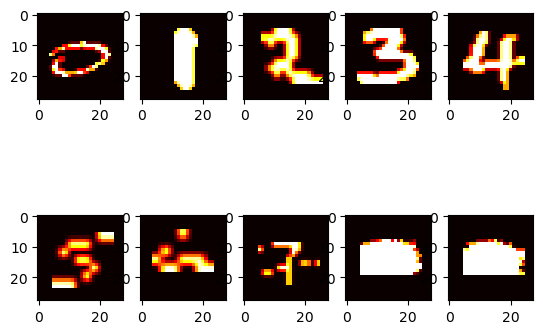

In [102]:
#Plot test images and display them---examine to compare with results above.
for file_index in range(num_images):
    plt.subplot(2,5,file_index+1)
    plt.imshow(test_images[file_index].reshape(28,28),cmap='hot')#cmap='gray' is a good alternative
    
plt.show()

In [103]:
pred=modelCNN.predict(test_images)
len(pred)

1/1 [==============================] - 0s 27ms/step


10

In [104]:
print(pred)

[[1.00000000e+00 0.00000000e+00 6.23913056e-23 7.00988571e-33
  5.65422305e-38 1.33861183e-16 1.34852494e-15 8.80687221e-17
  7.14396365e-28 9.10526445e-34]
 [2.75294805e-14 7.71543741e-01 1.63776165e-13 9.23150527e-21
  1.86968836e-19 2.49559150e-18 4.86962955e-13 1.79046329e-20
  2.28456229e-01 2.67564184e-19]
 [2.07256957e-25 1.44867665e-13 1.00000000e+00 8.25514336e-22
  1.66207446e-26 1.27611265e-34 1.37194949e-19 5.89273694e-21
  8.32569479e-23 4.58045952e-26]
 [1.93477929e-36 1.05488783e-34 1.05575921e-23 1.00000000e+00
  5.09129467e-32 4.37660777e-20 0.00000000e+00 1.07815352e-28
  1.95169913e-32 7.42745142e-33]
 [1.86056934e-33 9.34570596e-30 1.28876368e-26 0.00000000e+00
  1.00000000e+00 1.12648439e-32 1.19229177e-29 4.56368886e-38
  0.00000000e+00 0.00000000e+00]
 [6.28019979e-16 2.53718505e-11 1.82894620e-24 5.57960692e-11
  2.00546451e-14 1.00000000e+00 2.02399679e-08 2.43385908e-20
  3.47762819e-09 7.50292637e-15]
 [9.28469923e-09 1.30817718e-11 4.47452720e-03 8.26253128e

In [105]:
#Evaluate 
actual_digits=np.asarray([range(0,len(test_images))]).reshape(len(test_images),1)
loss,acc=modelCNN.evaluate(test_images,actual_digits, verbose=0)
print(f"Accuracy:{acc:.3f}")

Accuracy:0.600


In [106]:
actual_digits[9]

array([9])

In [108]:
#Uncomment if you want to save model.
modelCNN.save("saved-models/my_model.hdf5")